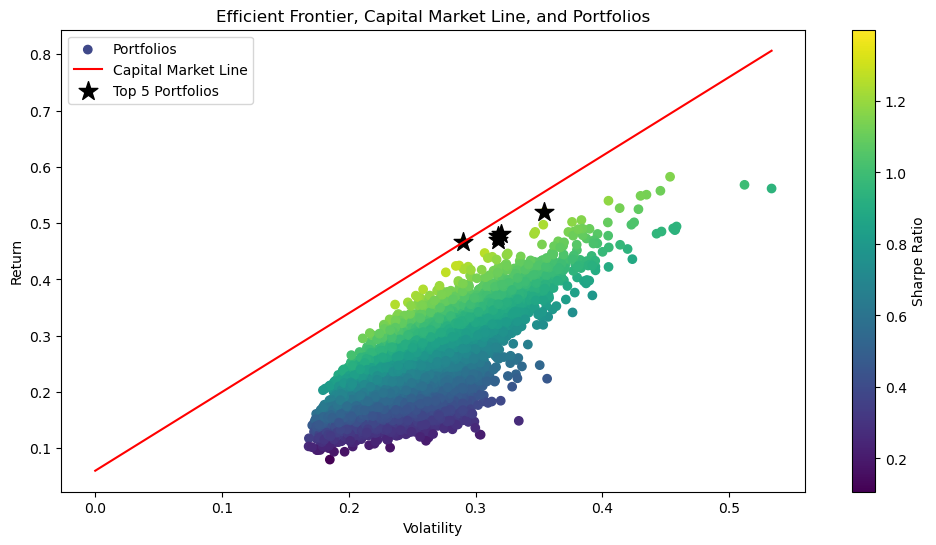

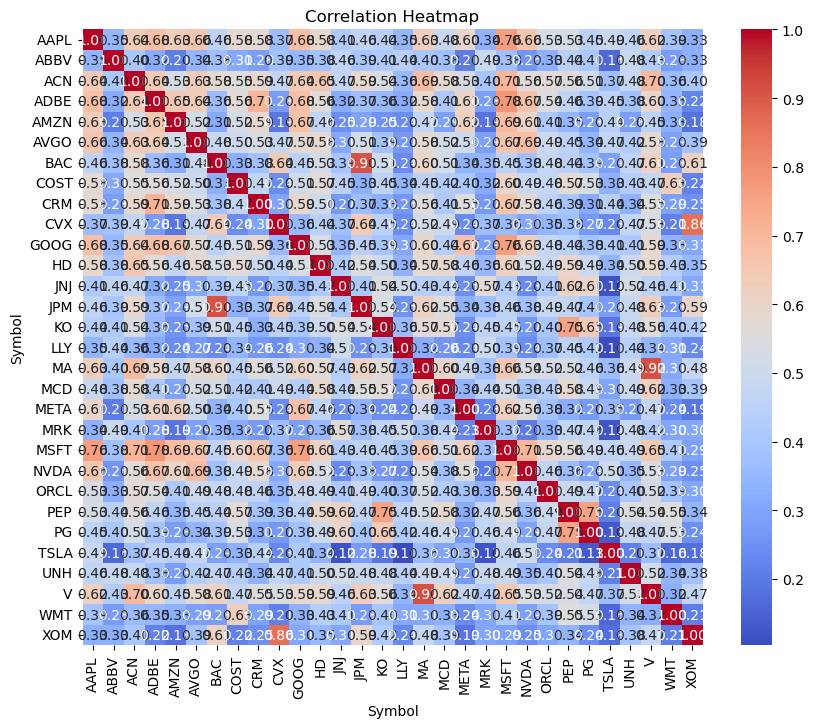

,Return,Volatility,Sharpe Ratio,Symbols,Weights
376,0.466137,0.290221,1.399403,"[NVDA, COST, LLY, AAPL, TSLA]","[0.1611341199748103, 0.012648458306507895, 0.4..."
7996,0.477788,0.317431,1.316153,"[TSLA, LLY, BAC, MA, NVDA]","[0.24955315375363718, 0.3726738200096037, 0.04..."
5758,0.480057,0.319693,1.313938,"[WMT, PG, NVDA, TSLA, LLY]","[0.14140694704710002, 0.007463735112303983, 0...."
5355,0.519594,0.354240,1.297407,"[LLY, NVDA, CVX, TSLA, ADBE]","[0.31751120146627954, 0.2786565051172265, 0.00..."
7023,0.469774,0.317521,1.290544,"[PEP, TSLA, NVDA, ORCL, LLY]","[0.055418245120255775, 0.26751643422165644, 0...."


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Load the data
file_path = r"master_data.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Calculate daily returns for each stock
daily_returns = data.pivot(columns='Symbol', values='Adj Close').pct_change()
daily_returns = daily_returns.dropna()

# Define constants
INVESTMENT = 1e7  # INR 1 Crore
MAX_WEIGHT = 0.3  # Maximum exposure in a single stock
NUM_STOCKS = 5    # Number of stocks in the portfolio
RISK_FREE_RATE = 0.06  # Assuming a risk-free rate of 6%

# Function to generate random portfolios
def generate_random_portfolios(num_portfolios: int) -> pd.DataFrame:
    portfolio_returns = []
    portfolio_volatilities = []
    portfolio_weights = []
    portfolio_symbols = []

    for _ in range(num_portfolios):
        selected_stocks = np.random.choice(daily_returns.columns, NUM_STOCKS, replace=False)
        weights = np.random.random(NUM_STOCKS)
        weights /= np.sum(weights)
        annualized_return = np.sum(daily_returns[selected_stocks].mean() * weights) * 252
        annualized_volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns[selected_stocks].cov() * 252, weights)))
        portfolio_returns.append(annualized_return)
        portfolio_volatilities.append(annualized_volatility)
        portfolio_weights.append(weights)
        portfolio_symbols.append(selected_stocks)

    portfolios = pd.DataFrame({
        'Return': portfolio_returns,
        'Volatility': portfolio_volatilities,
        'Weights': portfolio_weights,
        'Symbols': portfolio_symbols
    })
    portfolios['Sharpe Ratio'] = (portfolios['Return'] - RISK_FREE_RATE) / portfolios['Volatility']

    return portfolios

# Generate random portfolios
num_portfolios = 10000
portfolios = generate_random_portfolios(num_portfolios)

# Plot Efficient Frontier, Capital Market Line, and Scatter Plot of Portfolios
plt.figure(figsize=(12, 6))
plt.scatter(portfolios['Volatility'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier, Capital Market Line, and Portfolios')

# Capital Market Line
slope = (portfolios['Return'] - RISK_FREE_RATE) / portfolios['Volatility']
CML_x = np.linspace(0, max(portfolios['Volatility']), 200)
CML_y = RISK_FREE_RATE + slope.max() * CML_x
plt.plot(CML_x, CML_y, color='red', label='Capital Market Line')

# Highlight the top 5 most profitable portfolios based on Sharpe Ratio
top_portfolios = portfolios.sort_values(by='Sharpe Ratio', ascending=False).head(5)
plt.scatter(top_portfolios['Volatility'], top_portfolios['Return'], c='black', marker='*', s=200, label='Top 5 Portfolios')

plt.legend()
plt.show()

# Correlation Heatmap
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Display the top 5 most profitable portfolios based on Sharpe Ratio
top_portfolios[['Return', 'Volatility', 'Sharpe Ratio', 'Symbols', 'Weights']]